# Assigning additive DMS phenotypes to 10x data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
dfs = (pd.read_csv("data/10x/time_course/AV1/filtered_contig_annotations.csv"),
       pd.read_csv("data/10x/time_course/AV2/filtered_contig_annotations.csv"),
       pd.read_csv("data/10x/time_course/AV3/filtered_contig_annotations.csv")
       )
for i in range(3):
    dfs[i]['library'] = i + 1
df = pd.concat(dfs).reset_index(drop=True)

df

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,library
0,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_1,True,503,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYNSYPLTF,TGTCAGCAATATAACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,544,35,clonotype1,clonotype1_consensus_2,2246,1
1,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_1,True,546,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYNSYPPTF,TGTCAGCAATATAACAGCTATCCTCCCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,690,50,clonotype1,clonotype1_consensus_2,1619,1
2,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_2,True,595,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,CARDFDVW,TGTGCAAGGGACTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,40,7,clonotype1,clonotype1_consensus_1,1619,1
3,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_1,True,525,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYNSYPLTF,TGTCAGCAATATAACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,710,48,clonotype1,clonotype1_consensus_2,35,1
4,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_2,True,549,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,CARDFDVW,TGTGCAAGGGACTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,128,9,clonotype1,clonotype1_consensus_1,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17463,TTTGTCAGTTCCGTCT-1,True,TTTGTCAGTTCCGTCT-1_contig_1,True,524,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYKSYPLTF,TGTCAGCAATATAAGAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,6792,296,clonotype460,clonotype460_consensus_1,1,3
17464,TTTGTCATCATGGTCA-1,True,TTTGTCATCATGGTCA-1_contig_1,True,526,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYNSYPLTF,TGTCAGCAATATAACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGTTAGAAATAAAAC,1306,58,clonotype1,clonotype1_consensus_2,923,3
17465,TTTGTCATCATGGTCA-1,True,TTTGTCATCATGGTCA-1_contig_2,True,689,IGH,IGHV3-8,NaN,IGHJ1,IGHG2C,...,CGRDFDVW,TGTGGAAGGGATTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,106,10,clonotype1,clonotype1_consensus_1,923,3
17466,TTTGTCATCTTCATGT-1,True,TTTGTCATCTTCATGT-1_contig_1,True,545,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYNSYPLTF,TGTCAGCAATATAACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAGATAAAAC,2146,152,clonotype1,clonotype1_consensus_2,483,3


### Barcode multiplicity

Most are multiplicity two, for paired heavy and light chains from single cells.

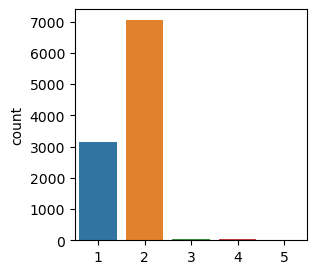

In [4]:
plt.figure(figsize=(3, 3))
sns.countplot(x=df.groupby("barcode").size())
# plt.yscale("log")
plt.show()


Filter to only barcodes with multiplicity two.

In [5]:
df = df.groupby("barcode").filter(lambda x: len(x.index) == 2)

## Load DMS data

In [6]:
dms_df = pd.read_csv("https://media.githubusercontent.com/media/jbloomlab/Ab-CGGnaive_DMS/main/results/final_variant_scores/final_variant_scores.csv", index_col="mutation", dtype=dict(position_IMGT=pd.Int16Dtype()))
# remove linker sites
dms_df = dms_df[dms_df.chain != "link"]
# add indicator for wildtype data
dms_df["WT"] = dms_df.wildtype == dms_df.mutant
assert dms_df.position_IMGT.max() < 1000
dms_df["site"] = [f"{chain}-{str(pos).zfill(3)}" for chain, pos in zip(dms_df.chain, dms_df.position_IMGT)]
dms_df

,target,wildtype,position,position_IMGT,chain,annotation,mutant,codon,single_nt,bind_CGG,...,expr,delta_expr,n_bc_expr,n_libs_expr,psr,delta_psr,n_bc_psr,n_libs_psr,WT,site
mutation,,,,,,,,,,,,,,,,,,,,,
E1(H)A,CGG_naive,E,1,1,H,FWRH1,A,GAG,True,10.48829,...,10.44614,-0.00453,19.0,2.0,6.78608,-0.07452,17.0,2.0,False,H-001
E1(H)C,CGG_naive,E,1,1,H,FWRH1,C,GAG,False,10.44477,...,10.32364,-0.12703,20.0,2.0,7.44234,0.58174,17.0,2.0,False,H-001
E1(H)D,CGG_naive,E,1,1,H,FWRH1,D,GAG,True,10.42771,...,10.51618,0.06551,16.0,2.0,6.95940,0.09880,13.0,2.0,False,H-001
E1(H)E,CGG_naive,E,1,1,H,FWRH1,E,GAG,True,10.45719,...,10.45067,0.00000,21170.0,2.0,6.86060,0.00000,18910.0,2.0,True,H-001
E1(H)F,CGG_naive,E,1,1,H,FWRH1,F,GAG,False,10.51899,...,10.33163,-0.11904,24.0,2.0,6.91372,0.05313,21.0,2.0,False,H-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R128(L)S,CGG_naive,R,235,128,L,FWRL4,S,CGT,True,10.44756,...,10.54313,0.09246,39.0,2.0,6.93925,0.07866,33.0,2.0,False,L-128
R128(L)T,CGG_naive,R,235,128,L,FWRL4,T,CGT,False,10.43023,...,10.53860,0.08793,36.0,2.0,6.88956,0.02896,34.0,2.0,False,L-128
R128(L)V,CGG_naive,R,235,128,L,FWRL4,V,CGT,False,10.38231,...,10.48707,0.03640,27.0,2.0,6.78160,-0.07899,24.0,2.0,False,L-128


### Load naive sequence with IMGT numbering

In [7]:
pos_df = pd.read_csv("https://raw.githubusercontent.com/jbloomlab/Ab-CGGnaive_DMS/main/data/CGGnaive_sites.csv", dtype=dict(site=pd.Int16Dtype()), index_col="site_scFv")
pos_df

,amino_acid,chain,site,KI_codon,annotation
site_scFv,,,,,
1,E,H,1,GAG,FWRH1
2,V,H,2,GTG,FWRH1
3,Q,H,3,CAG,FWRH1
4,L,H,4,CTT,FWRH1
5,Q,H,5,CAG,FWRH1
...,...,...,...,...,...
231,L,L,124,CTA,FWRL4
232,E,L,125,GAA,FWRL4
233,I,L,126,ATA,FWRL4


In [8]:
naive_H = "".join(pos_df.query("chain == 'H'").amino_acid)
naive_H, len(naive_H)

('EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLEYMGYISYSGSTYYNPSLKSRISITRDTSKNQYYLQLNSVTTEDTATYYCARDFDVWGAGTTVTVSS',
 112)

In [9]:
# note extra R at end of scFv sequence, which we exclude below
naive_L = "".join(pos_df.query("chain == 'L'").amino_acid)[:-1]
naive_L, len(naive_L)

('DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKALIYSASYRYSGVPDRFTGSGSGTDFTLTISNVQSEDLAEYFCQQYNSYPLTFGSGTKLEIK',
 107)

### Add full length amino-acid and nucleotide sequence to the 10x data frame

In [10]:
df["aa_seq"] = df.fwr1 + df.cdr1 + df.fwr2 + df.cdr2 + df.fwr3 + df.cdr3 + df.fwr4
df["nt_seq"] = df.fwr1_nt + df.cdr1_nt + df.fwr2_nt + df.cdr2_nt + df.fwr3_nt + df.cdr3_nt + df.fwr4_nt

### Distribution of sequence lengths

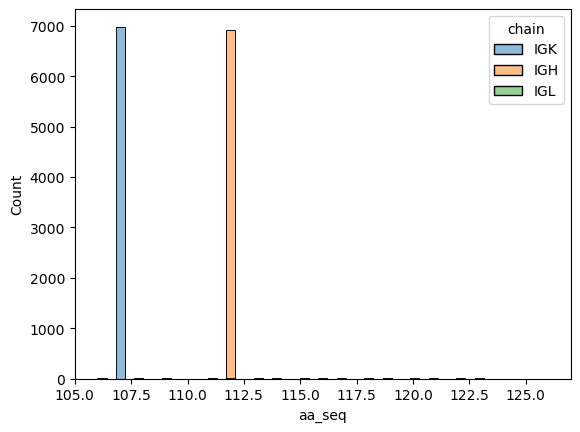

In [11]:
sns.histplot(x=df.aa_seq.str.len(), hue=df.chain)
# plt.yscale("log")
plt.show()

In [12]:
df.aa_seq.str.len().value_counts()

107    6981
112    6928
119      23
106      21
121      21
120      18
118      16
109      12
111      11
122      11
117      10
113      10
115       8
116       7
114       6
108       6
123       5
124       4
126       2
110       1
125       1
Name: aa_seq, dtype: int64

Filter to only sequences with the expected length of each chain

In [13]:
# Filter to only sequences with the expected length of each chain
df = df.loc[((df.chain == 'IGH') & (df.aa_seq.str.len() == len(naive_H))) | ((df.chain == 'IGK') & (df.aa_seq.str.len() == len(naive_L)))].reset_index(drop=True)

## Assign amino-acid mutations and additive phenotypes to 10x sequences

**Note**: we do not attempt to pair heavy and light chains from the same cell, so phenotypes are assigned to each chain independently.
Under an additive model, the values for each chain can be added to get the phenotype for the BCR

In [14]:
def get_mutations(naive_aa, aa, pos_map, chain_annotation):
    assert len(naive_aa) == len(aa)
    return [f"{aa1}{pos_map[pos]}{chain_annotation}{aa2}"
            for pos, (aa1, aa2) in enumerate(zip(naive_aa, aa))
            if aa1 != aa2]

In [15]:
pos_map_H = pos_df.loc[pos_df.chain == "H", "site"].reset_index(drop=True)
pos_map_L = pos_df.loc[pos_df.chain == "L", "site"].reset_index(drop=True)

In [16]:
for idx in df.index:
     if df.chain[idx] == "IGH":
          mutations = get_mutations(naive_H, df.aa_seq[idx], pos_map_H, "(H)")          
     elif df.chain[idx] == "IGK":
          mutations = get_mutations(naive_L, df.aa_seq[idx], pos_map_L, "(L)")
     else:
          print(f"skipping unexpected chain length {df.chain[idx]} {len(df.aa_seq[idx])}")
          continue

     df.loc[idx, "mutations"] = ",".join(mutations)
     df.loc[idx, "n_mutations"] = len(mutations)
     df.loc[idx, "delta_bind_CGG"] = dms_df.delta_bind_CGG[mutations].sum()
     df.loc[idx, "delta_expr"] = dms_df.delta_expr[mutations].sum()
     df.loc[idx, "delta_psr"] = dms_df.delta_psr[mutations].sum()

df.n_mutations = df.n_mutations.astype("Int64")

df

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,raw_consensus_id,exact_subclonotype_id,library,aa_seq,nt_seq,mutations,n_mutations,delta_bind_CGG,delta_expr,delta_psr
0,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_1,True,546,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1_consensus_2,1619,1,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,"G80(L)E,L116(L)P",2,-0.84078,-0.72872,-0.06667
1,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_2,True,595,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,clonotype1_consensus_1,1619,1,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,,0,0.00000,0.00000,0.00000
2,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_1,True,525,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1_consensus_2,35,1,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,,0,0.00000,0.00000,0.00000
3,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_2,True,549,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,clonotype1_consensus_1,35,1,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,,0,0.00000,0.00000,0.00000
4,AAACCTGAGTGCGTGA-1,True,AAACCTGAGTGCGTGA-1_contig_1,True,525,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1_consensus_2,1,1,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,,0,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13889,TTTGTCACATACTACG-1,True,TTTGTCACATACTACG-1_contig_2,True,529,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1_consensus_2,559,3,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVGWHQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,"A40(L)G,Y42(L)H,N108(L)K",3,1.58902,-0.50387,0.13111
13890,TTTGTCATCATGGTCA-1,True,TTTGTCATCATGGTCA-1_contig_1,True,526,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1_consensus_2,923,3,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVGWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,A40(L)G,1,0.85566,0.00031,-0.19452
13891,TTTGTCATCATGGTCA-1,True,TTTGTCATCATGGTCA-1_contig_2,True,689,IGH,IGHV3-8,NaN,IGHJ1,IGHG2C,...,clonotype1_consensus_1,923,3,EVQLQGSGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,GAGGTGCAGCTTCAGGGGTCAGGACCTAGCCTCGTGAAACCTTCTC...,"E6(H)G,S64(H)R,A105(H)G",3,1.25561,0.05877,0.43471
13892,TTTGTCATCTTCATGT-1,True,TTTGTCATCTTCATGT-1_contig_1,True,545,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1_consensus_2,483,3,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,Y66(L)S,1,-0.77802,-0.03548,-0.24799


In [78]:
import pickle
tree = pickle.load(open("../nextflow/results/latest/gctrees/PR1.1-1-LB-20-GC/gctree.p", "rb"))
foo = tree.tree.sequence

In [79]:
df.query("chain == 'IGH'")['nt_seq'].str.split("", expand=True).iloc[:, 1:-1].apply(pd.Series.value_counts)

def consensus_string(series):
    consensus = ''
    for i in range(len(series.iloc[0])):
        # Get the ith character of each string in the series
        chars = series.apply(lambda x: x[i])
        # Find the most frequent character at this position
        consensus += chars.mode()[0]
    return consensus

# Apply the function to the series
bar = consensus_string(df.query("chain == 'IGH'")['nt_seq'])

In [81]:
foo = foo[:len(bar)]
len(foo), len(bar)

(337, 337)

In [82]:
foo == bar

True

In [84]:
bar[3*95-1:(3*95 + 3 + 1)]

'TGCAA'

In [42]:
"GAAGTACAACTTCAAGAGTCTGGGCCGTCCCTGGTAAAGCCTTCTCAGACATTGTCACTGACTTGTAGCGTAACGGGCGATTCTATCACCAGTGGTTATTGGAACTGGATTCGTAAGTTTCCCGGAAATAAGCTGGAGTACATGGGATATATCAGTTACTCTGGATCTACCTACTACAATCCCAGCTTGAAGAGCAGGATCTCAATCACGAGGGACACATCTAAGAACCAATATTACTTACAGTTAAACTCAGTAACGACAGAGGATACCGCAACATATTATTGCGCCAGGGACTTTGATGTGTGGGGAGCAGGGACAACAGTAACGGTGAGCAGT"[3*95:(3*95 + 3)]

'CGCC'

In [44]:
"GAAGTACAACTTCAAGAGTCTGGGCCGTCCCTGGTAAAGCCTTCTCAGACATTGTCACTGACTTGTAGCGTAACGGGCGATTCTATCACCAGTGGTTATTGGAACTGGATTCGTAAGTTTCCCGGAAATAAGCTGGAGTACATGGGATATATCAGTTACTCTGGATCTACCTACTACAATCCCAGCTTGAAGAGCAGGATCTCAATCACGAGGGACACATCTAAGAACCAATATTACTTACAGTTAAACTCAGTAACGACAGAGGATACCGCAACATATTATTGCGCCAGGGACTTTGATGTGTGGGGAGCAGGGACAACAGTAACGGTGAGCAGT"[285:288]

'GCC'

In [43]:
3*95

285

## Pair heavy and light seqs

In [16]:
df = df.query("chain == 'IGH'").merge(df.query("chain == 'IGK'"), on=["barcode", "library"], how="inner", suffixes=("_H", "_L"))

df["delta_bind_CGG"] = df.delta_bind_CGG_H + df.delta_bind_CGG_L
df["delta_expr"] = df.delta_expr_H + df.delta_expr_L
df["delta_psr"] = df.delta_psr_H + df.delta_psr_L
df["n_mutations"] = df.n_mutations_H + df.n_mutations_L
df["nt_seq"] = df.nt_seq_H + df.nt_seq_L

Plot mutation counts

/opt/miniconda3/envs/replay/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/opt/miniconda3/envs/replay/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


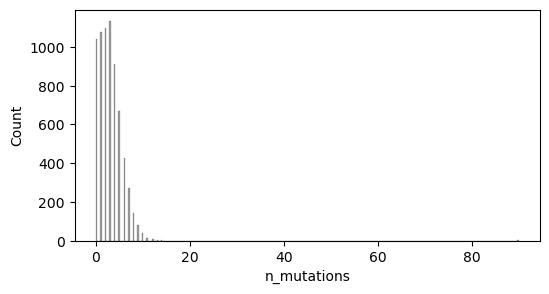

In [17]:
plt.figure(figsize=(6, 3))
sns.histplot(x=df.n_mutations, color="grey")
plt.show()

Filter the very large mutation sequence as a probable error

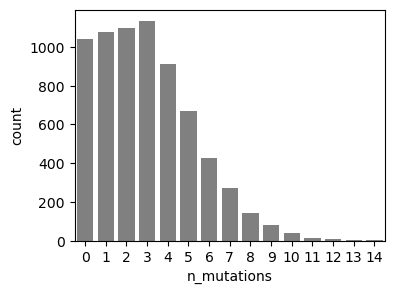

In [18]:
df = df.query("n_mutations < 50").reset_index(drop=True)

plt.figure(figsize=(4, 3))
sns.countplot(x=df.n_mutations, color="grey")
plt.show()

In [19]:
assert set((df.aa_seq_H + df.aa_seq_L).str.len().unique()) == {len(naive_H) + len(naive_L)}

## Read metadata on mice/times

In [20]:
metadata = pd.read_excel("data/10x/time_course/AV_VDJ_GEX_metadata.xlsx")[["Unnamed: 0", "orig.ident", "Conditions", "Mouse.ID"]]
metadata["barcode"] = metadata["Unnamed: 0"].str.split("_").str[0]
metadata["library"] = metadata["orig.ident"].str[-1].astype(int)
metadata["time (days)"] = metadata.Conditions.str.split("Day").str[1]
metadata["mouse"] = "D" + metadata.Conditions.str.split("Day").str[-1] + metadata["Mouse.ID"]
metadata.drop(columns=["Unnamed: 0", "orig.ident", "Mouse.ID", "Conditions"], inplace=True)

metadata

,barcode,library,time (days),mouse
0,AAACCTGAGAATCTCC-1,1,14,D14M1
1,AAACCTGAGCCGCCTA-1,1,8,D8M1
2,AAACCTGAGTGCGTGA-1,1,11,D11M1
3,AAACCTGCAAATACAG-1,1,17,D17M1
4,AAACCTGCAGTACACT-1,1,8,D8M4
...,...,...,...,...
9740,TTTGTCACACGACGAA-1,3,14,D14M3
9741,TTTGTCACATACTACG-1,3,11,D11M3
9742,TTTGTCAGTTCCGTCT-1,3,11,D11M3
9743,TTTGTCATCATGGTCA-1,3,17,D17M4


Merge with sequence data on barcode and library

In [21]:
df = df.merge(metadata, how="left", on=["barcode", "library"])
df

,barcode,is_cell_H,contig_id_H,high_confidence_H,length_H,chain_H,v_gene_H,d_gene_H,j_gene_H,c_gene_H,...,delta_bind_CGG_L,delta_expr_L,delta_psr_L,delta_bind_CGG,delta_expr,delta_psr,n_mutations,nt_seq,time (days),mouse
0,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_2,True,595,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,-0.84078,-0.72872,-0.06667,-0.84078,-0.72872,-0.06667,2,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,NaN,NaN
1,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_2,True,549,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,8,D8M1
2,AAACCTGAGTGCGTGA-1,True,AAACCTGAGTGCGTGA-1_contig_2,True,541,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,11,D11M1
3,AAACCTGCAGTACACT-1,True,AAACCTGCAGTACACT-1_contig_1,True,671,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,8,D8M4
4,AAACCTGGTCCGACGT-1,True,AAACCTGGTCCGACGT-1_contig_1,True,671,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,0.85566,0.00031,-0.19452,0.85566,0.00031,-0.19452,1,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,11,D11M1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6897,TTTGGTTTCTTTCCTC-1,True,TTTGGTTTCTTTCCTC-1_contig_1,True,542,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,0.99405,0.17718,-0.29861,1.37620,0.15535,-0.34901,9,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,17,D17M3
6898,TTTGTCACACGACGAA-1,True,TTTGTCACACGACGAA-1_contig_1,True,692,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,-0.02832,-0.05798,0.04810,0.22140,-0.26290,-0.37094,4,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,14,D14M3
6899,TTTGTCACATACTACG-1,True,TTTGTCACATACTACG-1_contig_1,True,551,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,1.58902,-0.50387,0.13111,0.82072,-0.64993,0.02096,5,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,11,D11M3
6900,TTTGTCATCATGGTCA-1,True,TTTGTCATCATGGTCA-1_contig_2,True,689,IGH,IGHV3-8,NaN,IGHJ1,IGHG2C,...,0.85566,0.00031,-0.19452,2.11127,0.05908,0.24019,4,GAGGTGCAGCTTCAGGGGTCAGGACCTAGCCTCGTGAAACCTTCTC...,17,D17M4


In [22]:
df["mouse"].value_counts(dropna=False)

NaN      1487
D8M1      459
D8M4      374
D11M1     373
D8M2      348
D17M1     314
D11M4     309
D14M1     281
D8M3      274
D11M2     256
D14M2     253
D11M3     249
D14M3     241
D20M1     236
D17M2     223
D17M3     219
D20M3     195
D17M4     191
D14M4     181
D20M2     160
D20M4     154
D5M3       75
D5M2       44
D5M4        3
D5M1        3
Name: mouse, dtype: int64

Why are there so many `NaN` above? It seems there are barcodes missing in the metadata file.

In [23]:
df.loc[df.mouse.isna(), ["library", "barcode"]]

,library,barcode
0,1,AAACCTGAGATGTTAG-1
6,1,AAACGGGAGCACCGTC-1
11,1,AAACGGGTCTGATTCT-1
15,1,AAAGATGTCATGTCTT-1
20,1,AAAGTAGCATTTCAGG-1
...,...,...
6871,3,TTGGAACGTAAGCACG-1
6882,3,TTGTAGGGTCCGAGTC-1
6883,3,TTGTAGGTCTATCGCC-1
6885,3,TTTACTGCAGCTGCAC-1


## Affinity distributions

In [24]:
order = sorted(df["time (days)"].dropna().unique(), key=lambda x: int(x))

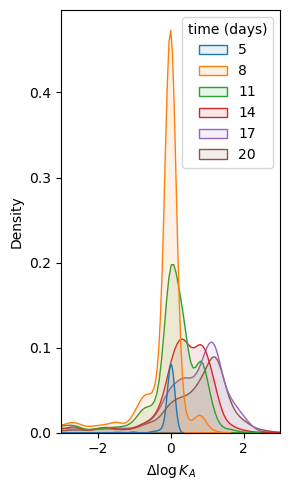

In [179]:
plt.figure(figsize=(3, 5))
sns.kdeplot(data=df, x="delta_bind_CGG", hue="time (days)", hue_order=order, fill=True, common_norm=True, alpha=0.1, bw_adjust=0.6)
plt.xlim(-3, 3)
plt.xlabel("$\Delta\log K_A$")
plt.tight_layout()
plt.savefig("output/10x/affinity_kde.pdf")
plt.show()

/var/folders/0w/l84hyz3n6ns582pxy6tkt8y80000gn/T/ipykernel_56703/1407465624.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.displot(data=df, kind="kde", x="delta_bind_CGG", row="time (days)", hue="mouse", row_order=order, fill=True, common_norm=True, alpha=0.1, bw_adjust=0.5, height=1.25, aspect=2.5, legend=False)
/var/folders/0w/l84hyz3n6ns582pxy6tkt8y80000gn/T/ipykernel_56703/1407465624.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.displot(data=df, kind="kde", x="delta_bind_CGG", row="time (days)", hue="mouse", row_order=order, fill=True, common_norm=True, alpha=0.1, bw_adjust=0.5, height=1.25, aspect=2.5, legend=False)


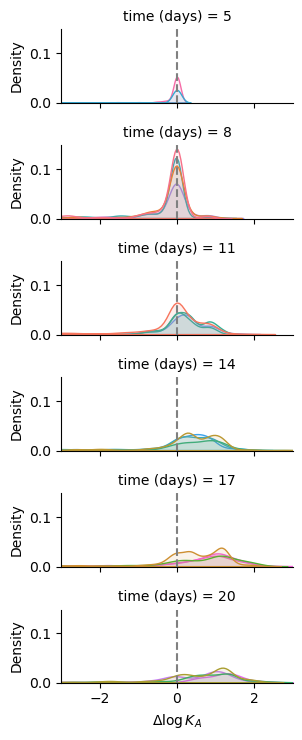

In [180]:
g = sns.displot(data=df, kind="kde", x="delta_bind_CGG", row="time (days)", hue="mouse", row_order=order, fill=True, common_norm=True, alpha=0.1, bw_adjust=0.5, height=1.25, aspect=2.5, legend=False)
plt.xlim(-3, 3)
plt.xlabel("$\Delta\log K_A$")
for ax in g.axes.flatten():
    ax.axvline(0, color="grey", linestyle="--")
plt.tight_layout()
plt.savefig("output/10x/affinity_kde_stratified.pdf")
plt.show()

/opt/miniconda3/envs/replay/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/opt/miniconda3/envs/replay/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/opt/miniconda3/envs/replay/lib/python3.9/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/opt/miniconda3/envs/replay/lib/python3.9/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed objec

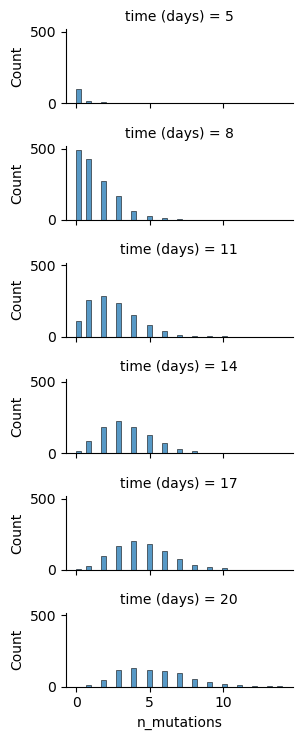

In [27]:
sns.displot(data=df, x="n_mutations", row="time (days)", row_order=order, aspect=2.5, height=1.25, legend=False)

In [82]:
df.groupby("time (days)").delta_bind_CGG.mean().loc[order]

time (days)
5    -0.110478
8    -0.401262
11   -0.094493
14    0.197407
17    0.480275
20    0.574845
Name: delta_bind_CGG, dtype: float64

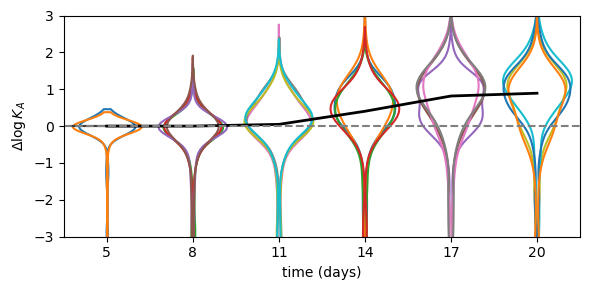

In [210]:
plt.figure(figsize=(6, 3))
ax = sns.violinplot(data=df, y="delta_bind_CGG", x="time (days)", hue=df.mouse.str.split("M").str[-1], order=order, dodge=False, inner=None)
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
sns.lineplot(data=df.groupby("time (days)").delta_bind_CGG.median().loc[order],
             color="black", linewidth=2)
plt.axhline(0, color="grey", linestyle="--")
# put more space on the right
plt.xlim(-0.5, 5.5)
plt.ylim(-3, 3)
plt.ylabel("$\Delta\log K_A$")
plt.legend().remove()
plt.tight_layout()
plt.savefig("output/10x/affinity_violin.pdf")
plt.show()

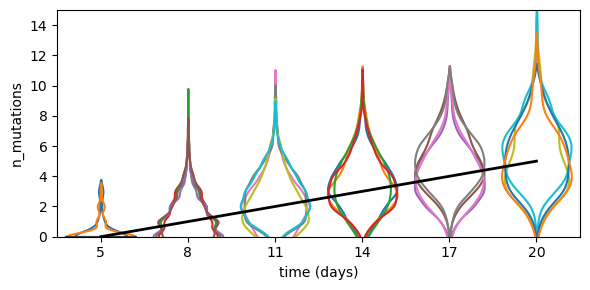

In [209]:
plt.figure(figsize=(6, 3))
ax = sns.violinplot(data=df, y=df.n_mutations.astype(float), x="time (days)", hue=df.mouse.str.split("M").str[-1], order=order, dodge=False, inner=None)
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
sns.lineplot(data=df.groupby("time (days)").n_mutations.median().loc[order],
             color="black", linewidth=2)
# put more space on the right
plt.xlim(-0.5, 5.5)
plt.ylim(0, 15)
plt.legend().remove()
plt.tight_layout()
plt.savefig("output/10x/mutations_violin.pdf")
plt.show()

### Plots using number of mutations instead of time

In [167]:
df["n_mutations_chunked"] = df.n_mutations.map(lambda x: f"{x}" if x < 8 else "8+")

0        2
1        0
2        0
3        0
4        1
        ..
6897    8+
6898     4
6899     5
6900     4
6901     5
Name: n_mutations_chunked, Length: 6902, dtype: object

In [168]:
foo_order = sorted(foo.unique(), key=lambda x: int(x.split("+")[0]))

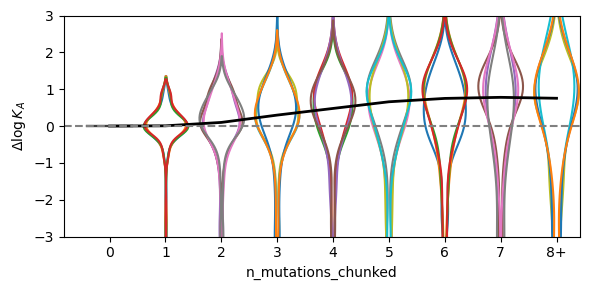

In [169]:
plt.figure(figsize=(6, 3))
ax = sns.violinplot(data=df, y="delta_bind_CGG", x="n_mutations_chunked", order=foo_order, hue=df.mouse.str.split("M").str[-1], dodge=False, inner=None)
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
sns.lineplot(data=df.groupby("n_mutations_chunked").delta_bind_CGG.median(),
             color="black", linewidth=2)
plt.axhline(0, color="grey", linestyle="--")
# put more space on the right
# plt.xlim(-0.5, 5.5)
plt.ylim(-3, 3)
plt.ylabel("$\Delta\log K_A$")
plt.legend().remove()
plt.tight_layout()
plt.savefig("output/10x/affinity_violin_mutations.pdf")
plt.show()

/var/folders/0w/l84hyz3n6ns582pxy6tkt8y80000gn/T/ipykernel_56703/27231564.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x="delta_bind_CGG", hue="n_mutations_chunked", hue_order=foo_order, fill=True, common_norm=False, alpha=0.1, bw_adjust=0.6)


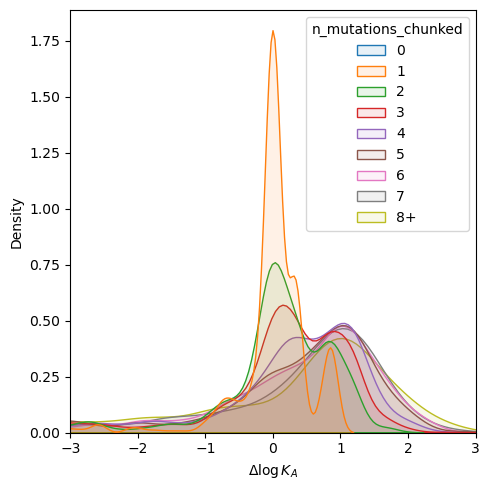

In [178]:
plt.figure(figsize=(5, 5))
sns.kdeplot(data=df, x="delta_bind_CGG", hue="n_mutations_chunked", hue_order=foo_order, fill=True, common_norm=False, alpha=0.1, bw_adjust=0.6)
plt.xlim(-3, 3)
plt.xlabel("$\Delta\log K_A$")
plt.tight_layout()
plt.savefig("output/10x/affinity_kde_mutations.pdf")
plt.show()

### Plotting jointly affinity and number of mutations

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

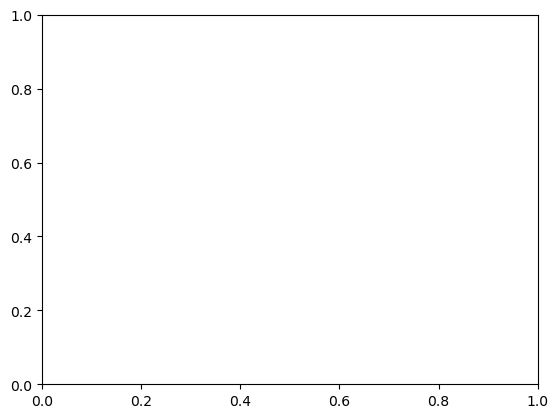

In [181]:
sns.kdeplot(data=df, y="delta_bind_CGG", x="n_mutations", hue="time (days)", hue_order=foo_order, fill=True, common_norm=False, alpha=0.1, bw_adjust=0.6, cumulative=True)

## Genotype frequency statistics

See [Slatkin (1994)](https://www.cambridge.org/core/journals/genetics-research/article/an-exact-test-for-neutrality-based-on-the-ewens-sampling-distribution/80F5ABCC3EEF65B742DC3A72DCCEB749).

/var/folders/0w/l84hyz3n6ns582pxy6tkt8y80000gn/T/ipykernel_56703/163046695.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(3, 3))


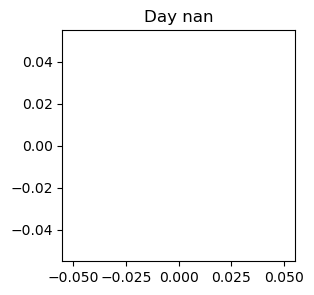

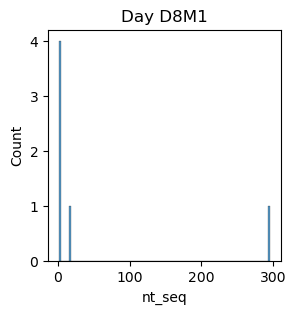

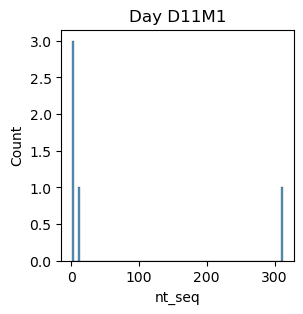

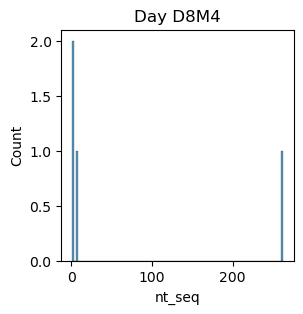

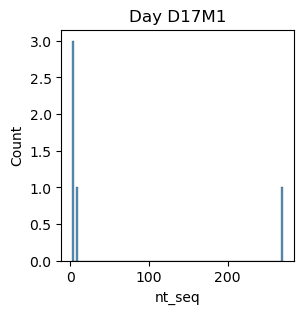

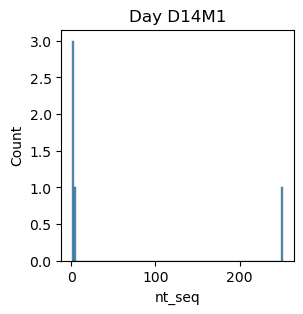

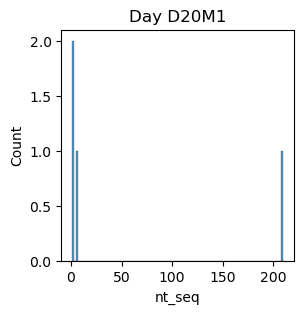

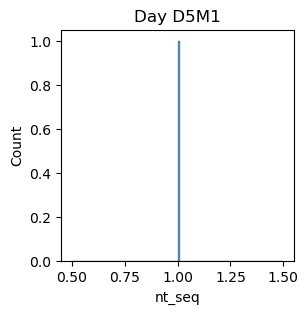

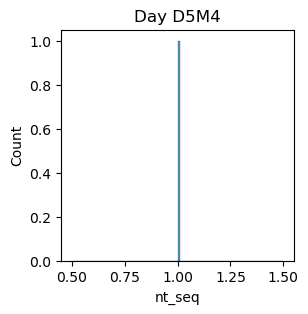

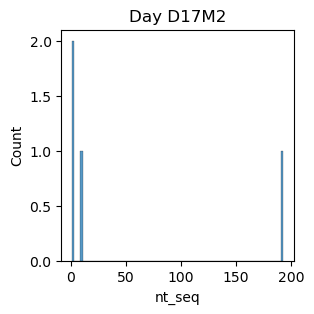

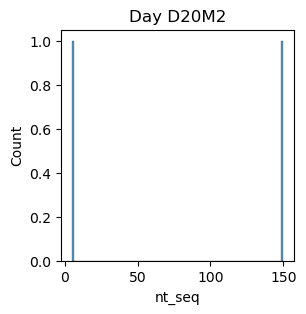

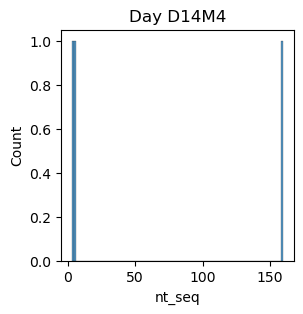

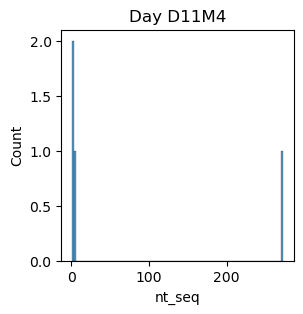

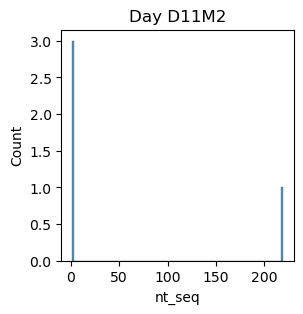

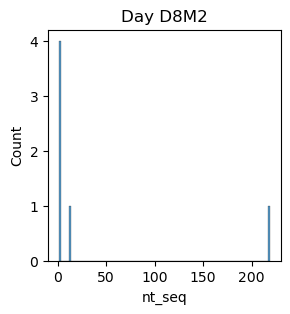

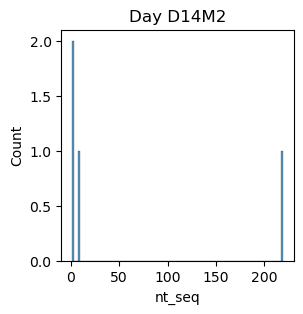

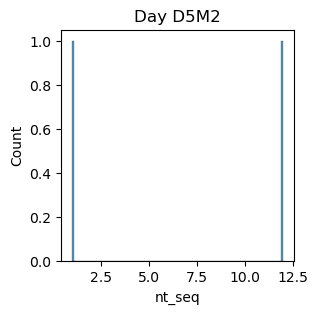

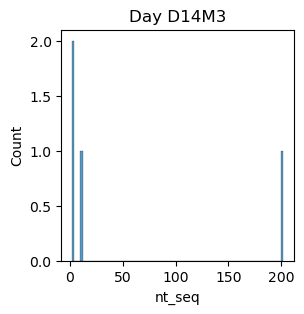

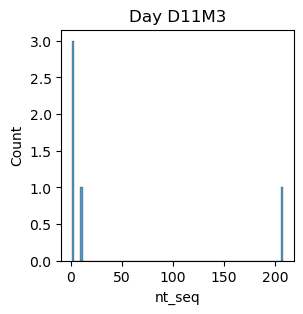

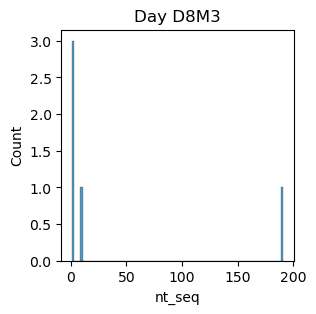

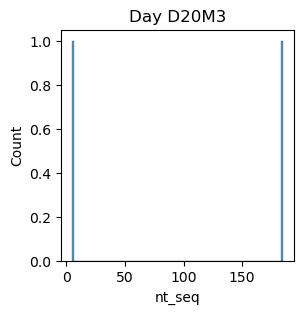

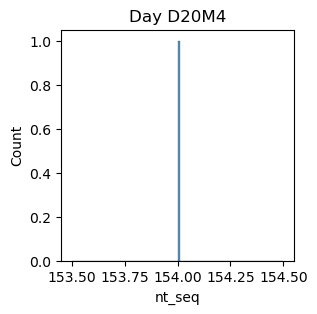

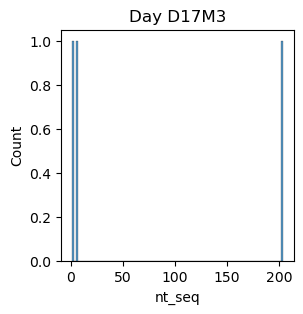

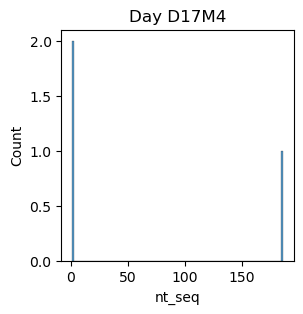

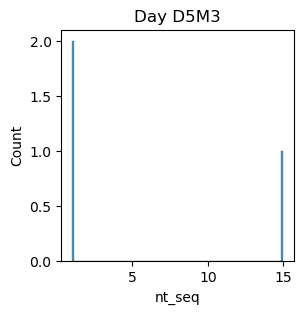

In [29]:
for val in df.mouse.unique():
    plt.figure(figsize=(3, 3))
    sns.histplot(x=df.query(f"mouse == '{val}'").nt_seq.value_counts().value_counts(), bins=100)
    plt.title(f"Day {val}")

## Write data frame to file

In [30]:
df.to_csv("output/10x/data.csv", index=False)